In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Zapoznanie się z danymi

In [2]:
height = np.array([[167, 172, 175, 179, 180, 181, 184, 188, 190]]).reshape(-1, 1)
weight = np.array([67, 73, 72, 77, 80, 84, 84, 87, 91])
height_test = np.array([[159, 200, 164, 176, 199]]).reshape(-1, 1)

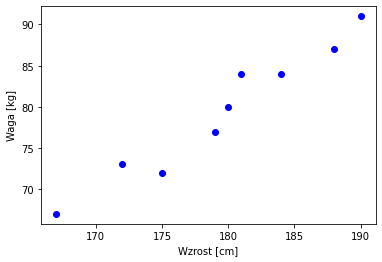

In [3]:
plt.scatter(height, weight, color='blue')
plt.xlabel('Wzrost [cm]')
plt.ylabel('Waga [kg]')
plt.show()

# Standaryzowanie danych

In [4]:
def scale_data(train_data, test_data):
    std = train_data.std()
    mean = train_data.mean()
    return (train_data - mean) / std, (test_data - mean) / std

In [5]:
height, height_test = scale_data(height, height_test)

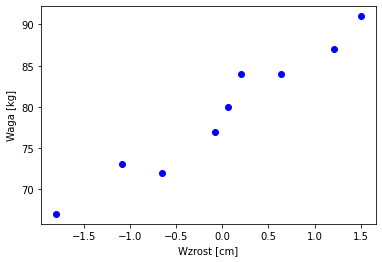

In [6]:
plt.scatter(height, weight, color='blue')
plt.xlabel('Wzrost [cm]')
plt.ylabel('Waga [kg]')
plt.show()

# Implementacja algorytmu

In [7]:
class LinearRegression:
    
    def __init__(self, eta=0.01, n_iters=10):
        self.eta = eta
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # inicjalizujemy wagi
        self.w = np.random.sample(n_features)
        self.b = np.random.sample()
        cost_ = []
        for i in range(self.n_iters):
            # przewidujemy wartość
            y_pred = self.predict(X)
            # liczymy wartość funkcji kosztu
            cost = self.__loss(y, y_pred)
            # liczymy średni błąd 
            error = (y_pred - y) / n_samples
            # aktualizujemy wagi
            self.w -= self.eta * np.dot(X.T, error)
            self.b -= self.eta * error.sum()
            cost_.append(cost)
        return cost_
            
    
    def predict(self, X):
        return np.dot(X, self.w) + self.b
    
    def __loss(self, y_true, y_pred):
        return ((y_true - y_pred) ** 2).mean() / 2
    

# Trenowanie algorytmu

In [8]:
n_iters = 100
lr = LinearRegression(eta=0.1, n_iters=n_iters)

In [9]:
loss = lr.fit(height, weight)

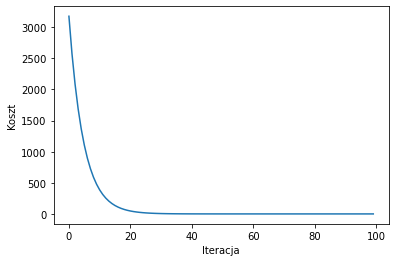

In [10]:
plt.plot(np.arange(0, n_iters, 1), loss)
plt.xlabel('Iteracja')
plt.ylabel('Koszt')
plt.show()

# Przewidywanie wartości

In [11]:
pred = lr.predict(height_test)
for height_, pred_weight_ in zip(height_test.reshape(1, -1)[0], pred):
    print(f'Wzorst: {height_} cm, przwidziana waga: {pred_weight_} kg')

Wzorst: -2.945800118255477 cm, przwidziana waga: 58.2514504087783 kg
Wzorst: 2.9298768743730186 cm, przwidziana waga: 100.51867639447556 kg
Wzorst: -2.229254143544685 cm, przwidziana waga: 63.40599016313162 kg
Wzorst: -0.5095438042387838 cm, przwidziana waga: 75.7768855735796 kg
Wzorst: 2.7865676794308603 cm, przwidziana waga: 99.48776844360489 kg


In [12]:
x = np.arange(-4, 4, 0.01)
y = lr.predict(x.reshape(-1,1))

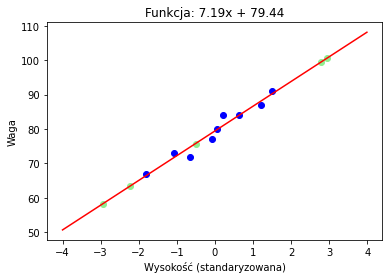

In [13]:
# rysujemy wykres 
plt.title(f'Funkcja: {round(lr.w[0], 2)}x + {round(lr.b, 2)}')
plt.scatter(height, weight, color='blue')
plt.scatter(height_test, pred, color='lightgreen')
plt.plot(x, y, color='red')
plt.xlabel('Wysokość (standaryzowana)')
plt.ylabel('Waga')
plt.show()